In [ ]:
#used for collab
from zipfile import ZipFile
with ZipFile('archive.zip') as zObject:
    zObject.extractall(path="/cat_dogs")

In [57]:
from PIL import Image
import os
import glob
import numpy as np
import pandas as pd


#Test dataframe
t_cats=r'cat_dogs\test\cats'
t_dogs=r'cat_dogs\test\dogs'
path1=glob.glob(os.path.join(t_cats, "*.jpg"))
path2=glob.glob(os.path.join(t_dogs, "*.jpg"))
path=path1+path2
id=list(range(0,140))
test_df=pd.DataFrame({
    'id':id,
    'Label':['cats']*70+['dog']*70,
    'class':[1]*70+[0]*70,
    'path':path,

})

#Train dataframe
tr_cats=r'cat_dogs\train\cats'
tr_dogs=r'cat_dogs\train\dogs'
tr_path1=glob.glob(os.path.join(tr_cats, "*.jpg"))
tr_path2=glob.glob(os.path.join(tr_dogs, "*.jpg"))
tr_path=tr_path1+tr_path2
id2=list(range(0,557))
train_df=pd.DataFrame({
    'id':id2,
    'Label':['cats']*279+['dog']*278,
    'class':[1]*279+[0]*278,
    'path':tr_path,

})



In [58]:
from sklearn.utils import shuffle
train_df=shuffle(train_df)
test_df=shuffle(test_df)


In [59]:
train_images=np.array([np.array(Image.open(i).convert('L').resize((100,100))) for i in train_df['path']])
test_images=np.array([np.array(Image.open(i).convert('L').resize((100,100)))for i in test_df['path']])
train_class=np.array(train_df['class'])
test_class=np.array(test_df['class'])


In [60]:
class_name=['Dog','Cat']

In [61]:
#train_images=np.array(train_images)
print(train_images.shape)
print(test_images.shape)
print(train_class.shape)
print(test_class.shape)

(557, 100, 100)
(140, 100, 100)
(557,)
(140,)


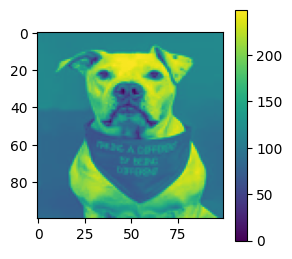

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [63]:
#scaling the color values between 0 to 1
train_images=train_images/255
test_images=test_images/255

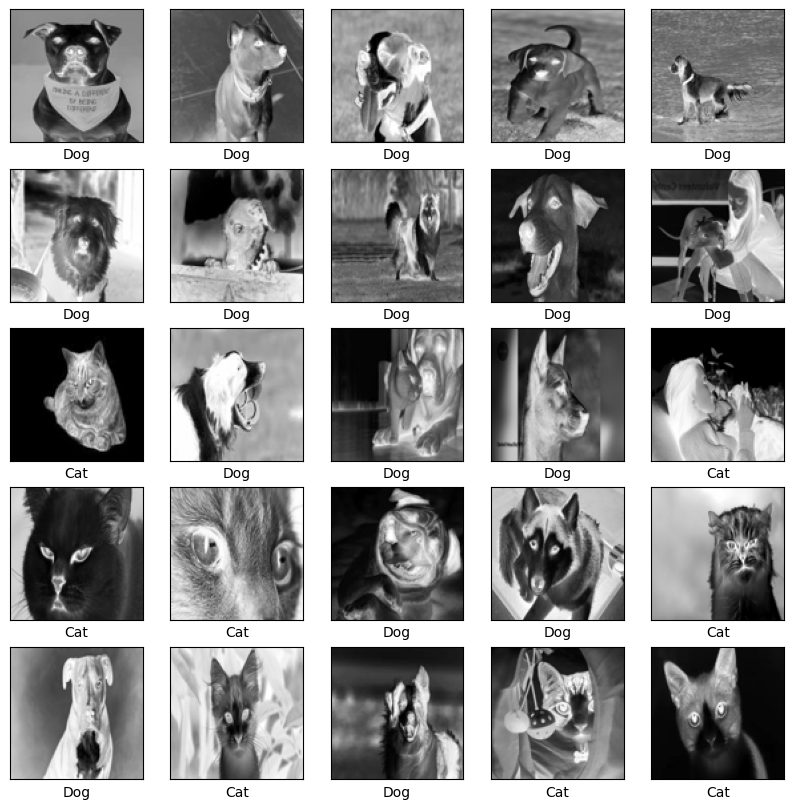

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[train_class[i]])
plt.show()

In [65]:
#Building models

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [76]:
model=Sequential([

    Conv2D(32,(3,3),input_shape=(100,100,1),activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(2,activation='softmax')
])

In [77]:
#compiling models
# ●	Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# ●	Optimizer —This is how the model is updated based on the data it sees and its loss function.
# ●	Metrics —Used to monitor the training and testing steps. This example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])


In [47]:
# #splitting test data into test and validation data 
# train_images,val_images,train_class,val_class=train_test_split(train_images,train_class,test_size=0.2)
# #defining early stopping
# early_stopping=EarlyStopping(monitor='accuracy',patience=5,restore_best_weights=True)

In [78]:
#fitting model  
model.fit(train_images,train_class,epochs=20)


Epoch 1/20


c:\Users\J.Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


18/18 [==============================] - 8s 345ms/step - loss: 0.8034 - accuracy: 0.5206
Epoch 2/20
18/18 [==============================] - 6s 345ms/step - loss: 0.6891 - accuracy: 0.5476
Epoch 3/20
18/18 [==============================] - 6s 341ms/step - loss: 0.6587 - accuracy: 0.6122
Epoch 4/20
18/18 [==============================] - 6s 346ms/step - loss: 0.6341 - accuracy: 0.6607
Epoch 5/20
18/18 [==============================] - 7s 368ms/step - loss: 0.5305 - accuracy: 0.7379
Epoch 6/20
18/18 [==============================] - 6s 334ms/step - loss: 0.4123 - accuracy: 0.8294
Epoch 7/20
18/18 [==============================] - 6s 350ms/step - loss: 0.2920 - accuracy: 0.8959
Epoch 8/20
18/18 [==============================] - 6s 356ms/step - loss: 0.2043 - accuracy: 0.9425
Epoch 9/20
18/18 [==============================] - 7s 402ms/step - loss: 0.1546 - accuracy: 0.9569
Epoch 10/20
18/18 [==============================] - 7s 367ms/step - loss: 0.0943 - accuracy: 0.9695
Epoch 11/2

In [79]:
loss,acc=model.evaluate(test_images,test_class)
print(acc)

5/5 [==============================] - 1s 79ms/step - loss: 1.5816 - accuracy: 0.6357
0.6357142925262451


In [80]:
prediction=model.predict(test_images)

5/5 [==============================] - 0s 67ms/step


In [82]:
pred_class=np.argmax(prediction,axis=1)
cm=confusion_matrix(test_class,pred_class)
cm


array([[44, 26],
       [25, 45]], dtype=int64)

In [83]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

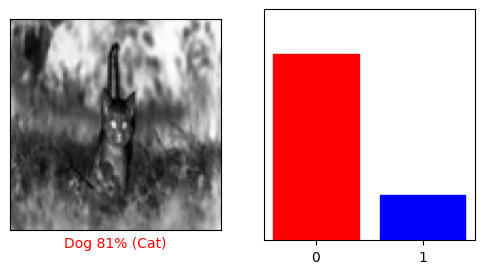

In [84]:
i = 129
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_class, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_class)
plt.show()

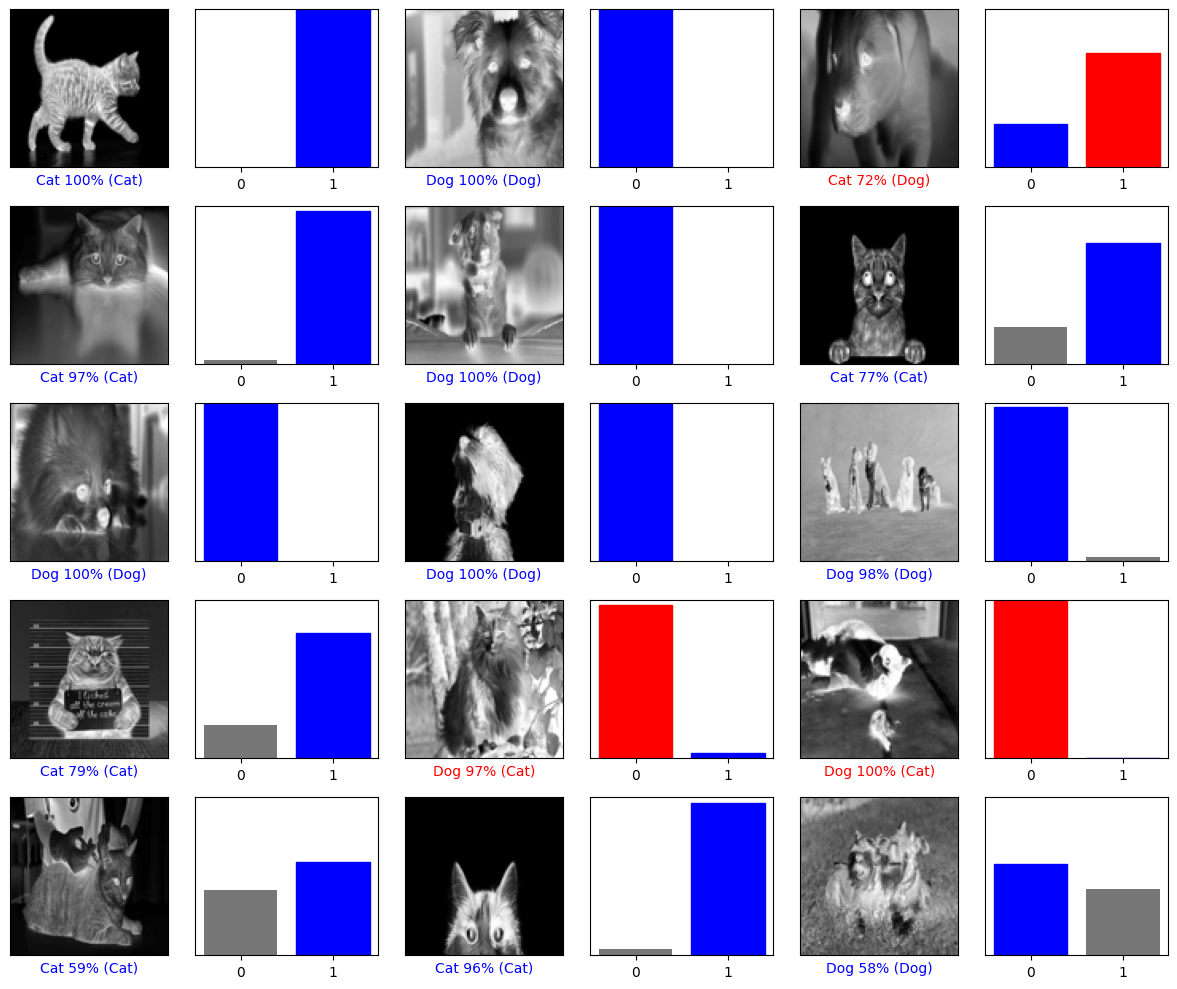

In [85]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_class, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_class)
plt.tight_layout()
plt.show()

In [88]:
img=r'cat.jpg'
img=np.array(Image.open(img).convert('L').resize((100,100)))
img=(np.expand_dims(img,0))
print(img.shape)

(1, 100, 100)


1/1 [==============================] - 0s 66ms/step
[[1. 0.]]


0

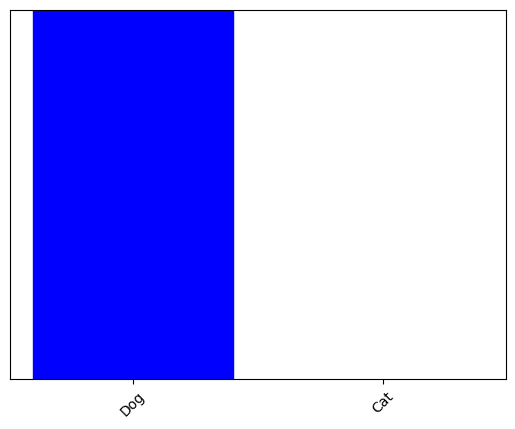

In [94]:
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_class)
_ = plt.xticks(range(2), class_name, rotation=45)
np.argmax(predictions_single[0])